In [262]:
import os
import pandas as pd
import matplotlib.pyplot as plt
instance = "d1"

files = os.listdir("../")

for p in files: 
    if p.split("_")[0] == instance:
        with open(os.path.join("../", p)) as f:
            lines = f.readlines()
        break
else:
    print("Not found")

In [263]:
class Point:
    def __init__(self, x, y):
        '''Defines x and y variables'''
        self.X = x
        self.Y = y

    def move(self, dx, dy):
        '''Determines where x and y move'''
        self.X = self.X + dx
        self.Y = self.Y + dy

    def __str__(self):
        return "Point(%s,%s)"%(self.X, self.Y) 


    def getX(self):
        return self.X

    def getY(self):
        return self.Y

    def d(self, other):
        dx = self.X - other.X
        dy = self.Y - other.Y
        return abs(dx)+abs(dy)
    
    def __iter__(self):
        return iter((self.X,self.Y))

    def testPoint(x=0,y=0):
        '''Returns a point and distance'''
        p1 = Point(3, 4)
        print(p1)
        p2 = Point(3,0)
        print(p2)
        return math.hypot(dx, dy)

In [264]:
R,C,F,N,B,T = map(int,lines[0].strip().split())
rides = []
for l in lines[1:]:
    a,b,x,y,s,f = map(int,l.strip().split())
    rides += [(Point(a,b),Point(x,y),s,f)]
rides_df = pd.DataFrame(rides, columns = ["start","end", "start_time","end_time"])

print("(x,y):",(R,C))
print("# Cars:", F)
print("# Clients:", N)
print("Bonus:", B)
print("Time:", T)

rides_df.describe()

(x,y): (10000, 10000)
# Cars: 400
# Clients: 9322
Bonus: 2
Time: 50000


,start_time,end_time
count,9322.000000,9322.000000
mean,30331.107917,38590.121004
std,10507.404584,9214.768554
min,1.000000,2597.000000
25%,23476.250000,32089.750000
50%,31376.000000,39457.500000
75%,38289.000000,46861.000000
max,49766.000000,50000.000000


Text(0.5, 1.0, 'distances')

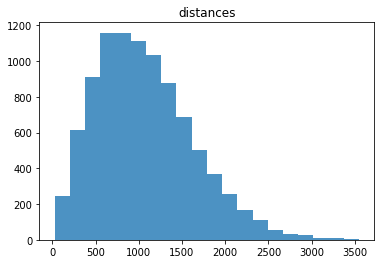

In [265]:
ds =[]
for ride in rides:
    s,f, ts,tf = ride
    ds.append(s.d(f))
plt.figure()
plt.hist(ds, alpha =0.8,  bins = 20)
plt.title("distances")

Text(0.5, 1.0, 'times')

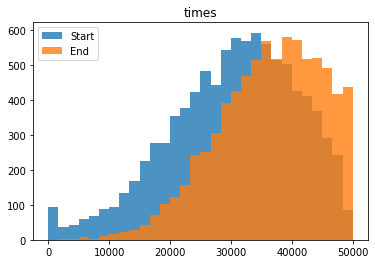

In [266]:
plt.figure()
bins = range(min(rides_df['start_time']), max(rides_df['end_time']), int((max(rides_df['end_time'])-min(rides_df['start_time']))/30))
plt.hist(rides_df['start_time'], alpha = 0.8, bins = bins, label="start")
plt.hist(rides_df['end_time'], alpha = 0.8, bins=bins, label ="end");
plt.legend(["Start","End"])
plt.title("times")

Text(0.5, 1.0, 'times')

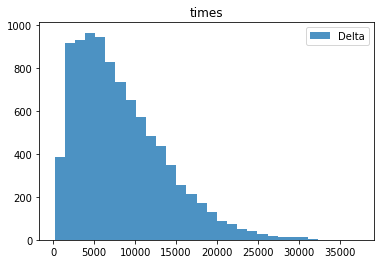

In [267]:
plt.figure()

plt.hist(rides_df['end_time']-rides_df['start_time'], alpha = 0.8, bins = 30, label="start")
plt.legend(["Delta"])
plt.title("times")

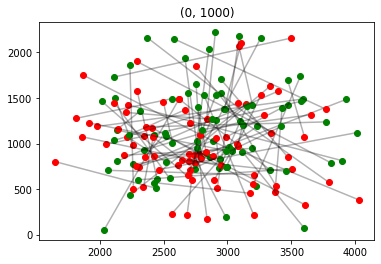

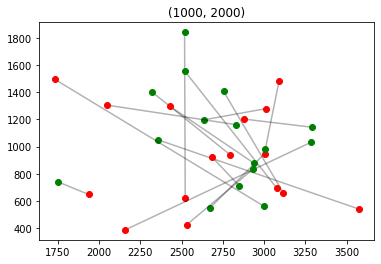

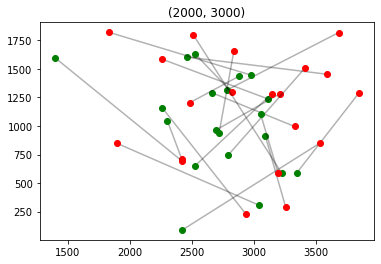

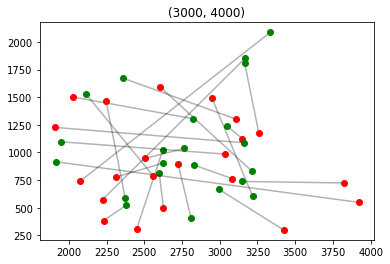

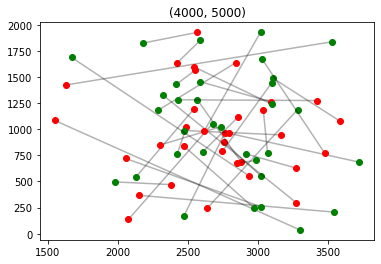

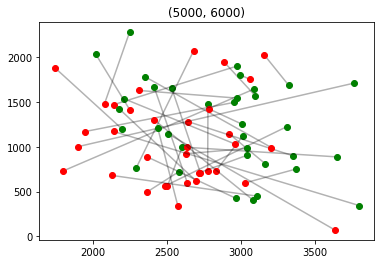

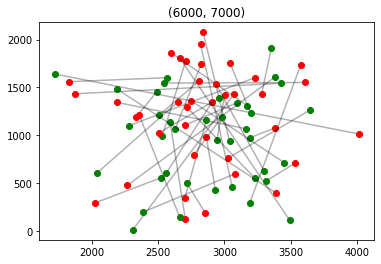

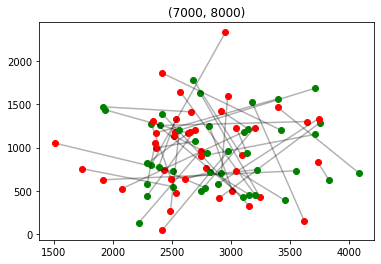

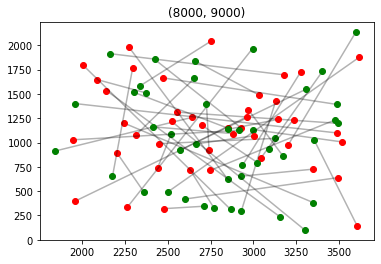

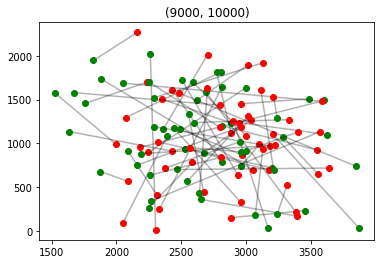

In [269]:

dt =1000
for i in range(int(T/dt))[:10]:
    time_period = (i*dt,(i+1)*dt)
    plt.figure()
    for ride in rides:
        s, f, ts,tf = ride
        x,y = zip(s,f)
        if time_period[0]<=ts <=  time_period[1]:
            plt.plot(x,y, 'black', alpha=0.3)
            plt.plot(*s, '.g',  markersize = 12)
            plt.plot(*f, '.r',  markersize = 12)
    plt.title(time_period)

In [235]:
# Filter outliers for D

In [236]:
from sklearn.cluster import DBSCAN
points = [[x,y] for x,y in rides_df['end']]

In [245]:
clusters = DBSCAN(metric = "manhattan", eps = 100).fit(points).labels_ 

In [246]:
rides_df['clusters'] = clusters

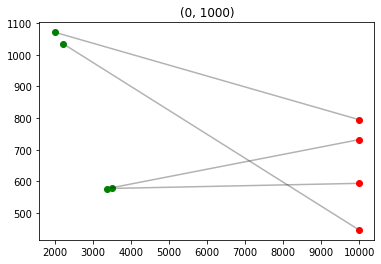

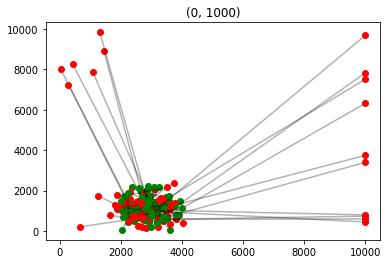

In [249]:

dt =1000
for i in range(int(T/dt))[:1]:
    time_period = (i*dt,(i+1)*dt)
    plt.figure()
    for i,ride in rides_df[clusters == 1].iterrows():
        x,y = zip(ride.start,ride.end)
        if time_period[0]<=ride.start_time <=  time_period[1]:
            plt.plot(x,y, 'black', alpha=0.3)
            plt.plot(*ride.start, '.g',  markersize = 12)
            plt.plot(*ride.end, '.r',  markersize = 12)
    plt.title(time_period)
    
    plt.figure()
    for i,ride in rides_df.iterrows():
        x,y = zip(ride.start,ride.end)
        if time_period[0]<=ride.start_time <=  time_period[1]:
            plt.plot(x,y, 'black', alpha=0.3)
            plt.plot(*ride.start, '.g',  markersize = 12)
            plt.plot(*ride.end, '.r',  markersize = 12)
    plt.title(time_period)

In [248]:
from collections import Counter

Counter(rides_df['clusters'])

Counter({0: 9322,
         1: 135,
         -1: 388,
         2: 11,
         3: 5,
         4: 18,
         5: 19,
         12: 11,
         19: 7,
         9: 9,
         13: 13,
         10: 5,
         6: 11,
         7: 8,
         8: 7,
         16: 5,
         11: 6,
         18: 5,
         14: 8,
         15: 6,
         17: 1})

In [260]:
with open("d1_without_outliers.in", 'w') as f:
    new_N = rides_df[clusters == 0].shape[0]
    f.write(f"{R} {C} {F} {new_N} {B} {T}\n")
    for i,ride in rides_df[clusters == 0].iterrows():
        f.write(f"{ride.start.X} {ride.start.Y} {ride.end.X} {ride.end.Y} {ride.start_time} {ride.end_time}\n")